In [12]:
import os
import re

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [2]:
DIR_PATH = './data/'
for filename in os.listdir(DIR_PATH):
    print(filename)

19.11.28 список образцов Моча.xlsx
urine_chm1-250.csv


In [29]:
# Таблица с данными о пациентах и результаты анализа от поликлиники 
Matching_Table = pd.read_excel(DIR_PATH + '19.11.28 список образцов Моча.xlsx', header=2)

In [30]:
# Dataset с измеренными спектрами тех же образцов
Spectra_Data = pd.read_csv(DIR_PATH + 'urine_chm1-250.csv')

In [31]:
REMOVE_s = re.compile(r's$')
Spectra_Data['Dataset'] = list(map(lambda x: re.sub(REMOVE_s,'', x), Spectra_Data.Dataset.values))

In [32]:
Matching_Table

,Порядковый номер,Значение BAR-CODE,номера спектров,ФИО,Unnamed: 4,Пол,Возраст,Цвет,Плотность,Плотность.1,...,Дрожжи.1,Малые клетки,Малые клетки.1,Цилиндры патологические,Цилиндры патологические.1,Слизь,Слизь.1,Сперматозоиды,Сперматозоиды.1,TOTAL
0,Chm1,10178199.0,NaN,NaN,NaN,m,24.0,COLORLESS,1.006,1.0,...,0.0,0.2,0.0,1.29,1.0,0.0,0.0,0.0,0.0,8.0
1,Chm2,10152917.0,NaN,NaN,NaN,f,62.0,YELLOW,1.028,0.0,...,0.0,6.3,1.0,3.11,1.0,42.0,1.0,0.0,0.0,12.0
2,Chm3,10152925.0,NaN,NaN,NaN,f,71.0,YELLOW,1.009,1.0,...,0.0,2.9,0.0,0.12,0.0,0.4,0.0,0.0,0.0,3.0
3,Chm4,10162383.0,NaN,NaN,NaN,f,57.0,YELLOW,1.018,0.0,...,0.0,2.7,0.0,0.64,0.0,0.1,0.0,0.0,0.0,4.0
4,Chm5,10163935.0,NaN,NaN,NaN,m,77.0,LIGHT YELLOW,1.029,1.0,...,0.0,1.5,0.0,0.00,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
385,Chm396,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
386,Chm397,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
387,Chm398,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
388,Chm399,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [63]:
Need_Cols = ['Порядковый номер', 'Пол', 'Возраст', 'Цвет', 'Плотность', 'TOTAL']
Dataset = pd.merge(Matching_Table[Need_Cols], Spectra_Data, left_on='Порядковый номер', right_on='Dataset', how='inner').dropna()

In [64]:
Dataset.drop(['Id', 'CreationStamp', 'Dataset'], axis=1, inplace=True)

In [65]:
Dataset

,Порядковый номер,Пол,Возраст,Цвет,Плотность,TOTAL,Description,Ch_0_0,Ch_0_1,Ch_0_2,...,Ch_1_8,Ch_1_9,Ch_1_10,Ch_1_11,Ch_1_12,Ch_1_13,Ch_1_14,Ch_1_15,Ch_1_16,Ch_1_17
0,Chm1,m,24.0,COLORLESS,1.006,8.0,Spectrum1,116.2066,86.67870,501.8073,...,241.2221,660.4495,738.9610,748.5693,419.7867,606.7318,113.9607,206.4316,103.1565,146.9493
1,Chm1,m,24.0,COLORLESS,1.006,8.0,Spectrum2,110.4915,89.53624,495.1797,...,232.0723,638.8227,729.3528,700.5281,408.5924,614.5677,118.5191,212.2925,106.0760,155.7079
2,Chm1,m,24.0,COLORLESS,1.006,8.0,Spectrum3,103.8239,81.91614,484.7648,...,232.0723,661.2813,748.5693,736.3406,400.7564,640.3147,118.5191,227.2702,107.0492,140.1371
3,Chm1,m,24.0,COLORLESS,1.006,8.0,Spectrum4,109.5390,85.72619,510.3286,...,231.2405,657.1223,756.4305,726.7324,415.3090,632.4786,121.1239,224.6654,108.0223,163.4933
4,Chm1,m,24.0,COLORLESS,1.006,8.0,Spectrum5,105.7290,82.86865,488.5520,...,236.2313,671.2629,765.1653,750.3162,408.5924,574.2682,119.1703,233.7822,107.0492,142.0834
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2080,Chm223,m,75.0,LIGHT YELLOW,1.013,0.0,Spectrum6,122.8742,100.96640,615.4241,...,263.6807,807.6782,938.9871,863.8682,528.3716,682.8531,159.5450,272.2032,139.1639,167.3860
2081,Chm223,m,75.0,LIGHT YELLOW,1.013,0.0,Spectrum7,123.8267,101.91890,615.4241,...,263.6807,805.1827,940.7341,864.7416,530.6104,680.6142,160.1962,272.2032,140.1371,168.3591
2082,Chm223,m,75.0,LIGHT YELLOW,1.013,0.0,Spectrum8,123.8267,102.87140,620.1581,...,263.6807,806.8463,931.1259,854.2599,530.6104,742.1829,160.1962,262.4352,140.1371,190.7421
2083,Chm223,m,75.0,LIGHT YELLOW,1.013,0.0,Spectrum9,123.8267,100.96640,617.3177,...,263.6807,810.1735,937.2402,881.3376,530.6104,706.3611,160.1962,289.7857,140.1371,174.1982


In [66]:
Reordered_Dataset = Dataset.filter(regex='^Ch')
cols = ['Пол', 'Возраст', "Цвет", "Плотность", 'Порядковый номер', 'Description', 'TOTAL']
Reordered_Dataset[cols] = Dataset.loc[:,cols]

/opt/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/pandas/core/frame.py:3509: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [67]:
Reordered_Dataset

,Ch_0_0,Ch_0_1,Ch_0_2,Ch_0_3,Ch_0_4,Ch_0_5,Ch_0_6,Ch_0_7,Ch_0_8,Ch_0_9,...,Ch_1_15,Ch_1_16,Ch_1_17,Пол,Возраст,Цвет,Плотность,Порядковый номер,Description,TOTAL
0,116.2066,86.67870,501.8073,1966.517,1211.834,3746.119,420.2404,1028.663,1396.969,233.9503,...,206.4316,103.1565,146.9493,m,24.0,COLORLESS,1.006,Chm1,Spectrum1,8.0
1,110.4915,89.53624,495.1797,2054.570,1219.735,3993.029,410.4901,1043.288,1414.642,244.8904,...,212.2925,106.0760,155.7079,m,24.0,COLORLESS,1.006,Chm1,Spectrum2,8.0
2,103.8239,81.91614,484.7648,1963.676,1213.810,3925.869,400.7397,1040.363,1449.987,248.2566,...,227.2702,107.0492,140.1371,m,24.0,COLORLESS,1.006,Chm1,Spectrum3,8.0
3,109.5390,85.72619,510.3286,2041.314,1270.105,4032.534,412.4402,1055.964,1477.758,249.0982,...,224.6654,108.0223,163.4933,m,24.0,COLORLESS,1.006,Chm1,Spectrum4,8.0
4,105.7290,82.86865,488.5520,1967.463,1214.797,3926.857,408.5400,1042.313,1459.244,248.2566,...,233.7822,107.0492,142.0834,m,24.0,COLORLESS,1.006,Chm1,Spectrum5,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2080,122.8742,100.96640,615.4241,2518.505,1602.940,4523.391,458.2668,1229.520,1789.131,290.3340,...,272.2032,139.1639,167.3860,m,75.0,LIGHT YELLOW,1.013,Chm223,Spectrum6,0.0
2081,123.8267,101.91890,615.4241,2538.387,1601.952,4537.218,458.2668,1234.395,1789.972,292.8587,...,272.2032,140.1371,168.3591,m,75.0,LIGHT YELLOW,1.013,Chm223,Spectrum7,0.0
2082,123.8267,102.87140,620.1581,2545.962,1616.767,4524.379,460.2169,1231.470,1800.912,289.4925,...,262.4352,140.1371,190.7421,m,75.0,LIGHT YELLOW,1.013,Chm223,Spectrum8,0.0
2083,123.8267,100.96640,617.3177,2519.451,1605.903,4507.589,459.2419,1232.445,1795.863,290.3340,...,289.7857,140.1371,174.1982,m,75.0,LIGHT YELLOW,1.013,Chm223,Spectrum9,0.0


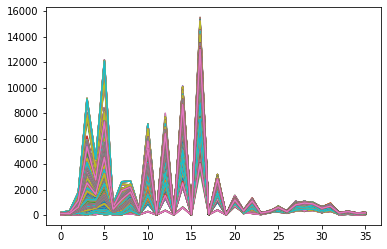

In [68]:
for spec in Reordered_Dataset.filter(regex='^Ch').values:
    plt.plot(spec)

In [60]:
Reordered_Dataset.to_csv('Urine_Chms_1_223_Dataset.csv', index=0)

In [69]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
Specs = Reordered_Dataset.filter(regex='^Ch')
Reordered_Dataset.loc[:, Specs.columns] = mms.fit_transform(Specs.values.T).T

In [70]:
Reordered_Dataset

,Ch_0_0,Ch_0_1,Ch_0_2,Ch_0_3,Ch_0_4,Ch_0_5,Ch_0_6,Ch_0_7,Ch_0_8,Ch_0_9,...,Ch_1_15,Ch_1_16,Ch_1_17,Пол,Возраст,Цвет,Плотность,Порядковый номер,Description,TOTAL
0,0.009548,0.006474,0.049685,0.202149,0.123593,0.387389,0.041195,0.104526,0.142864,0.021804,...,0.018939,0.008189,0.012748,m,24.0,COLORLESS,1.006,Chm1,Spectrum1,8.0
1,0.008944,0.006740,0.049408,0.213435,0.125622,0.417335,0.040500,0.107062,0.146123,0.023081,...,0.019652,0.008480,0.013700,m,24.0,COLORLESS,1.006,Chm1,Spectrum2,8.0
2,0.007399,0.005264,0.044529,0.188678,0.115589,0.379931,0.036340,0.098683,0.138609,0.021477,...,0.019432,0.007714,0.010939,m,24.0,COLORLESS,1.006,Chm1,Spectrum3,8.0
3,0.008285,0.005911,0.048244,0.200886,0.123995,0.399413,0.038485,0.102645,0.144699,0.022199,...,0.019763,0.008134,0.013665,m,24.0,COLORLESS,1.006,Chm1,Spectrum4,8.0
4,0.007441,0.005255,0.044043,0.185445,0.113481,0.372787,0.036393,0.096989,0.136853,0.021068,...,0.019684,0.007567,0.010917,m,24.0,COLORLESS,1.006,Chm1,Spectrum5,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2080,0.006937,0.005250,0.044873,0.191446,0.120930,0.345861,0.032769,0.092170,0.135271,0.019835,...,0.018438,0.008192,0.010365,m,75.0,LIGHT YELLOW,1.013,Chm223,Spectrum6,0.0
2081,0.006998,0.005314,0.044793,0.192635,0.120639,0.346309,0.032710,0.092381,0.135095,0.019994,...,0.018406,0.008252,0.010422,m,75.0,LIGHT YELLOW,1.013,Chm223,Spectrum7,0.0
2082,0.007037,0.005417,0.045411,0.194302,0.122463,0.347262,0.033045,0.092674,0.136700,0.019846,...,0.017754,0.008298,0.012211,m,75.0,LIGHT YELLOW,1.013,Chm223,Spectrum8,0.0
2083,0.007006,0.005247,0.044992,0.191405,0.121087,0.344439,0.032824,0.092340,0.135709,0.019823,...,0.019781,0.008262,0.010884,m,75.0,LIGHT YELLOW,1.013,Chm223,Spectrum9,0.0


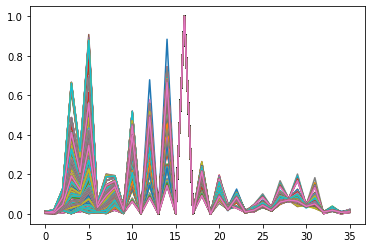

In [71]:
for spec in Reordered_Dataset.filter(regex='^Ch').values:
    plt.plot(spec)